Imports 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications.resnet50 import ResNet50
from keras.models import Model

Constants

In [4]:
BATCH_SZ = 32
IMG_H = 128
IMG_W = 128
DATA_DIR = './labeled_data'
RAND_SEED = 123

Split dataset into training and validation sets.

In [7]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset='training',
    seed=RAND_SEED,

    batch_size=BATCH_SZ,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMG_H, IMG_W),
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset='validation',
    seed=RAND_SEED,

    batch_size=BATCH_SZ,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    image_size=(IMG_H, IMG_W),
)

Found 1536 files belonging to 6 classes.
Using 1229 files for training.
Found 1536 files belonging to 6 classes.
Using 307 files for validation.


Build model. We have 3 preprocessing layers, then resnet50 as a base, then two dense layers, then 1 feature layer.

In [8]:
https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9data_aug = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip(input_shape=(IMG_H, IMG_W, 3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.Rescaling(1./255)
    ]
)

base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_H, IMG_W, 3)
)
base_output = base_model.layers[-1].output
base_output = keras.layers.Flatten()(base_output)
base_model = keras.Model(base_model.input, outputs=base_output)
base_model.trainable = False

model = keras.Sequential()
model.add(data_aug)
model.add(base_model)
model.add(keras.layers.Dense(512, activation='relu', input_dim=(IMG_H, IMG_W, 3)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation='relu', input_dim=(IMG_H, IMG_W, 3)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(6, activation='sigmoid'))

model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['accuracy'])
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
functional_1 (Functional)    (None, 32768)             23587712  
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                

Train model.

In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    verbose=2,
    epochs=epochs
)

Epoch 1/500
39/39 - 5s - loss: 1.7305 - accuracy: 0.2229 - val_loss: 1.6962 - val_accuracy: 0.2280
Epoch 2/500
39/39 - 4s - loss: 1.7231 - accuracy: 0.2181 - val_loss: 1.6897 - val_accuracy: 0.3485
Epoch 3/500
39/39 - 4s - loss: 1.7126 - accuracy: 0.2449 - val_loss: 1.6847 - val_accuracy: 0.2443
Epoch 4/500
39/39 - 4s - loss: 1.7090 - accuracy: 0.2482 - val_loss: 1.6757 - val_accuracy: 0.2671
Epoch 5/500
39/39 - 4s - loss: 1.7083 - accuracy: 0.2441 - val_loss: 1.6657 - val_accuracy: 0.2443
Epoch 6/500
39/39 - 4s - loss: 1.6930 - accuracy: 0.2596 - val_loss: 1.6533 - val_accuracy: 0.3062
Epoch 7/500
39/39 - 4s - loss: 1.6702 - accuracy: 0.2840 - val_loss: 1.6520 - val_accuracy: 0.2899
Epoch 8/500
39/39 - 4s - loss: 1.6555 - accuracy: 0.3133 - val_loss: 1.6039 - val_accuracy: 0.4593
Epoch 9/500
39/39 - 4s - loss: 1.6389 - accuracy: 0.3068 - val_loss: 1.5973 - val_accuracy: 0.4365
Epoch 10/500
39/39 - 4s - loss: 1.6241 - accuracy: 0.3385 - val_loss: 1.6246 - val_accuracy: 0.3485
Epoch 11/

39/39 - 4s - loss: 1.3081 - accuracy: 0.6282 - val_loss: 1.2795 - val_accuracy: 0.6808
Epoch 84/500
39/39 - 4s - loss: 1.3188 - accuracy: 0.6111 - val_loss: 1.2897 - val_accuracy: 0.6840
Epoch 85/500
39/39 - 4s - loss: 1.3070 - accuracy: 0.6257 - val_loss: 1.2426 - val_accuracy: 0.7068
Epoch 86/500
39/39 - 4s - loss: 1.2978 - accuracy: 0.6371 - val_loss: 1.3289 - val_accuracy: 0.5505
Epoch 87/500
39/39 - 4s - loss: 1.3087 - accuracy: 0.6322 - val_loss: 1.2985 - val_accuracy: 0.6287
Epoch 88/500
39/39 - 4s - loss: 1.3018 - accuracy: 0.6501 - val_loss: 1.3155 - val_accuracy: 0.6059
Epoch 89/500
39/39 - 4s - loss: 1.2995 - accuracy: 0.6452 - val_loss: 1.3734 - val_accuracy: 0.5472
Epoch 90/500
39/39 - 4s - loss: 1.3075 - accuracy: 0.6469 - val_loss: 1.2933 - val_accuracy: 0.6482
Epoch 91/500
39/39 - 4s - loss: 1.2982 - accuracy: 0.6322 - val_loss: 1.2486 - val_accuracy: 0.6971
Epoch 92/500
39/39 - 4s - loss: 1.2893 - accuracy: 0.6387 - val_loss: 1.3095 - val_accuracy: 0.6384
Epoch 93/500


Epoch 165/500
39/39 - 4s - loss: 1.2338 - accuracy: 0.7592 - val_loss: 1.2033 - val_accuracy: 0.7752
Epoch 166/500
39/39 - 4s - loss: 1.2553 - accuracy: 0.7429 - val_loss: 1.2340 - val_accuracy: 0.7231
Epoch 167/500
39/39 - 4s - loss: 1.2336 - accuracy: 0.7681 - val_loss: 1.2239 - val_accuracy: 0.7329
Epoch 168/500
39/39 - 4s - loss: 1.2330 - accuracy: 0.7486 - val_loss: 1.2206 - val_accuracy: 0.7492
Epoch 169/500
39/39 - 4s - loss: 1.2389 - accuracy: 0.7616 - val_loss: 1.2104 - val_accuracy: 0.7622
Epoch 170/500
39/39 - 4s - loss: 1.2341 - accuracy: 0.7828 - val_loss: 1.2209 - val_accuracy: 0.7752
Epoch 171/500
39/39 - 4s - loss: 1.2418 - accuracy: 0.7616 - val_loss: 1.1932 - val_accuracy: 0.7883
Epoch 172/500
39/39 - 4s - loss: 1.2466 - accuracy: 0.7722 - val_loss: 1.2819 - val_accuracy: 0.6612
Epoch 173/500
39/39 - 4s - loss: 1.2418 - accuracy: 0.7648 - val_loss: 1.2251 - val_accuracy: 0.7524
Epoch 174/500
39/39 - 4s - loss: 1.2362 - accuracy: 0.7803 - val_loss: 1.2564 - val_accurac

39/39 - 4s - loss: 1.2042 - accuracy: 0.8161 - val_loss: 1.1819 - val_accuracy: 0.8404
Epoch 247/500
39/39 - 4s - loss: 1.1937 - accuracy: 0.8291 - val_loss: 1.1501 - val_accuracy: 0.8827
Epoch 248/500
39/39 - 4s - loss: 1.1886 - accuracy: 0.8356 - val_loss: 1.2157 - val_accuracy: 0.8208
Epoch 249/500
39/39 - 4s - loss: 1.2037 - accuracy: 0.8047 - val_loss: 1.1738 - val_accuracy: 0.8404
Epoch 250/500
39/39 - 4s - loss: 1.1960 - accuracy: 0.8283 - val_loss: 1.2078 - val_accuracy: 0.7818
Epoch 251/500
39/39 - 4s - loss: 1.1966 - accuracy: 0.8161 - val_loss: 1.2048 - val_accuracy: 0.8339
Epoch 252/500
39/39 - 4s - loss: 1.1954 - accuracy: 0.8218 - val_loss: 1.1955 - val_accuracy: 0.8371
Epoch 253/500
39/39 - 4s - loss: 1.1975 - accuracy: 0.8202 - val_loss: 1.1908 - val_accuracy: 0.8306
Epoch 254/500
39/39 - 4s - loss: 1.2052 - accuracy: 0.8129 - val_loss: 1.2017 - val_accuracy: 0.8306
Epoch 255/500
39/39 - 4s - loss: 1.1969 - accuracy: 0.8299 - val_loss: 1.1806 - val_accuracy: 0.8664
Epoc

Epoch 328/500
39/39 - 4s - loss: 1.1791 - accuracy: 0.8365 - val_loss: 1.1844 - val_accuracy: 0.8404
Epoch 329/500
39/39 - 4s - loss: 1.1842 - accuracy: 0.8527 - val_loss: 1.1971 - val_accuracy: 0.8306
Epoch 330/500
39/39 - 4s - loss: 1.1779 - accuracy: 0.8430 - val_loss: 1.1626 - val_accuracy: 0.8469
Epoch 331/500
39/39 - 4s - loss: 1.1726 - accuracy: 0.8625 - val_loss: 1.1807 - val_accuracy: 0.8664
Epoch 332/500
39/39 - 4s - loss: 1.1850 - accuracy: 0.8381 - val_loss: 1.1585 - val_accuracy: 0.8762
Epoch 333/500
39/39 - 4s - loss: 1.1718 - accuracy: 0.8519 - val_loss: 1.1657 - val_accuracy: 0.8730
Epoch 334/500
39/39 - 4s - loss: 1.1844 - accuracy: 0.8373 - val_loss: 1.2090 - val_accuracy: 0.8274
Epoch 335/500
39/39 - 4s - loss: 1.1743 - accuracy: 0.8454 - val_loss: 1.1491 - val_accuracy: 0.8762
Epoch 336/500
39/39 - 4s - loss: 1.1744 - accuracy: 0.8519 - val_loss: 1.2017 - val_accuracy: 0.8143
Epoch 337/500
39/39 - 4s - loss: 1.1811 - accuracy: 0.8454 - val_loss: 1.1655 - val_accurac

39/39 - 4s - loss: 1.1764 - accuracy: 0.8568 - val_loss: 1.1390 - val_accuracy: 0.8990
Epoch 410/500
39/39 - 4s - loss: 1.1618 - accuracy: 0.8649 - val_loss: 1.1599 - val_accuracy: 0.8762
Epoch 411/500
39/39 - 4s - loss: 1.1644 - accuracy: 0.8592 - val_loss: 1.2662 - val_accuracy: 0.7394
Epoch 412/500
39/39 - 4s - loss: 1.1655 - accuracy: 0.8609 - val_loss: 1.1544 - val_accuracy: 0.8697
Epoch 413/500
39/39 - 4s - loss: 1.1687 - accuracy: 0.8609 - val_loss: 1.1495 - val_accuracy: 0.8827
Epoch 414/500
39/39 - 4s - loss: 1.1625 - accuracy: 0.8609 - val_loss: 1.1451 - val_accuracy: 0.8827
Epoch 415/500
39/39 - 4s - loss: 1.1558 - accuracy: 0.8731 - val_loss: 1.1375 - val_accuracy: 0.8990
Epoch 416/500
39/39 - 4s - loss: 1.1728 - accuracy: 0.8511 - val_loss: 1.1494 - val_accuracy: 0.8730
Epoch 417/500
39/39 - 4s - loss: 1.1708 - accuracy: 0.8600 - val_loss: 1.1794 - val_accuracy: 0.8502
Epoch 418/500
39/39 - 4s - loss: 1.1741 - accuracy: 0.8462 - val_loss: 1.1423 - val_accuracy: 0.8925
Epoc

Epoch 491/500
39/39 - 4s - loss: 1.1636 - accuracy: 0.8576 - val_loss: 1.1349 - val_accuracy: 0.9121
Epoch 492/500
39/39 - 4s - loss: 1.1534 - accuracy: 0.8779 - val_loss: 1.1373 - val_accuracy: 0.8925
Epoch 493/500
39/39 - 4s - loss: 1.1572 - accuracy: 0.8804 - val_loss: 1.1474 - val_accuracy: 0.8827
Epoch 494/500
39/39 - 4s - loss: 1.1627 - accuracy: 0.8625 - val_loss: 1.1502 - val_accuracy: 0.8762
Epoch 495/500
39/39 - 4s - loss: 1.1485 - accuracy: 0.8755 - val_loss: 1.1361 - val_accuracy: 0.9121
Epoch 496/500
39/39 - 4s - loss: 1.1650 - accuracy: 0.8674 - val_loss: 1.1413 - val_accuracy: 0.9121
Epoch 497/500
39/39 - 4s - loss: 1.1593 - accuracy: 0.8641 - val_loss: 1.1368 - val_accuracy: 0.9088
Epoch 498/500
39/39 - 4s - loss: 1.1627 - accuracy: 0.8714 - val_loss: 1.1713 - val_accuracy: 0.8632
Epoch 499/500
39/39 - 4s - loss: 1.1551 - accuracy: 0.8731 - val_loss: 1.1823 - val_accuracy: 0.8502
Epoch 500/500
39/39 - 4s - loss: 1.1549 - accuracy: 0.8706 - val_loss: 1.1892 - val_accurac

Display model val and train loss

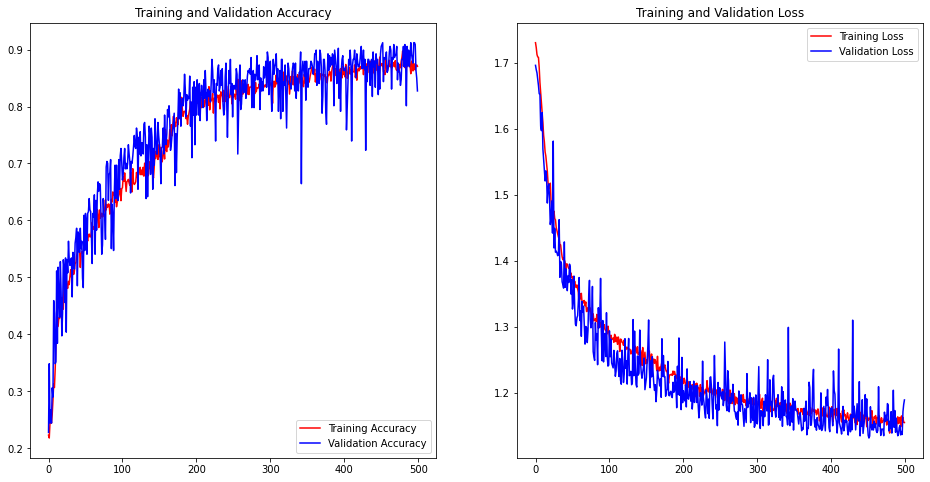

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc,'b', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Save the model 

In [14]:
model.save('./model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/assets
